# Example of data pre-processing

### Time-Series Preprocessing and Power Spectral Density

Time-series preprocessing is a crucial step in data analysis, particularly in fields like signal processing and data science. It involves several techniques aimed at enhancing the quality of the data, removing noise, and preparing it for further analysis. One essential aspect of time-series preprocessing is the calculation of the Power Spectral Density (PSD).

#### What is Time-Series Preprocessing?

- **Noise Removal**: Techniques such as filtering (e.g., low-pass, high-pass, band-pass) are used to remove unwanted noise from the signal.
- **Detrending**: Removing trends from the data to focus on the underlying patterns or fluctuations.
- **Normalization**: Scaling the data to a common range or distribution, often between 0 and 1, to facilitate comparisons between different datasets.
- **Resampling**: Changing the sampling rate of the time series to match a desired frequency or to reduce computational complexity.
- **Missing Data Handling**: Techniques for handling missing or incomplete data points, such as interpolation or imputation.

#### Power Spectral Density (PSD)

- **Definition**: The Power Spectral Density (PSD) is a measure of the power distribution of a signal as a function of frequency.
- **Calculation**: It is calculated using techniques such as the Fast Fourier Transform (FFT) or the Welch method, which estimate the power spectrum of a signal from its time-domain representation.
- **Interpretation**: PSD analysis helps in understanding the frequency components present in the signal and their relative strengths.
- **Applications**: PSD is widely used for analyzing periodicities, identifying dominant frequencies, and characterizing noise properties.
- **Normalization**: Often, PSD values are normalized to account for differences in signal power or to compare signals with different units or scales.

 


In [1]:
# Importing the sys module to manipulate the Python runtime environment
import sys

# Adding a specific path to the beginning of the sys.path list
# This path points to a directory containing Python packages
# This is typically done to ensure that the desired version of a package is used
# In this case, the path points to the site-packages directory of the igwn-py39 environment
sys.path = ['/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages'] + sys.path

In [2]:
# Importing the pyplot module from the matplotlib library and aliasing it as plt
from matplotlib import pyplot as plt

# Importing the gwpy library, which provides tools for gravitational wave data analysis
import gwpy

# Importing the TimeSeries class from the gwpy.timeseries module
from gwpy.timeseries import TimeSeries

# Importing the NumPy library and aliasing it as np
import numpy as np

# Importing the Pandas library and aliasing it as pd
import pandas as pd

# Importing the seaborn library for statistical data visualization
import seaborn as sns


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/cvmfs/software.igw

In [3]:
# Setting the path to the directory containing the Einstein Telescope Mock Data Challenge 1 (MDC1) data
MDC_PATH = "/cvmfs/et-gw.osgstorage.org/et-gw/PUBLIC/MDC1/data"

# Defining a list of datasets, each identified by a string (E0, E1, ..., C2)
DATASETS = ['E0','E1','E2','E3','C1','C2']

# Creating a dictionary to map each dataset to its corresponding channel
# Each channel is specified as a string with the dataset name followed by ":STRAIN"
CHANNELS = {n : f'{n}:STRAIN' for n in DATASETS}

## Read the data from the frame file

In [4]:
# Reading a gravitational wave strain time series from a GWF file using the gwpy library
# The file path is constructed based on the MDC_PATH and dataset ('E1') information
e0 = TimeSeries.read(MDC_PATH+'/E1/E-E1_STRAIN_DATA-1000000000-2048.gwf', 'E1:STRAIN',start=1000000001, end=1000000017)
 
# Printing the first 10 elements of the TimeSeries object (time series data)
# The TimeSeries object contains various metadata and information about the strain data
print(e0[1:10])


TimeSeries([-1.35513273e-23, -3.96557650e-24, -8.79714856e-23,
             2.38959618e-22, -1.15766869e-22,  9.51058486e-23,
            -6.18471556e-23,  2.21893145e-23, -2.74685570e-23]
           unit: strain,
           t0: 1000000001.0001221 s,
           dt: 0.0001220703125 s,
           name: E1:STRAIN,
           channel: E1:STRAIN)


## Plot the time series

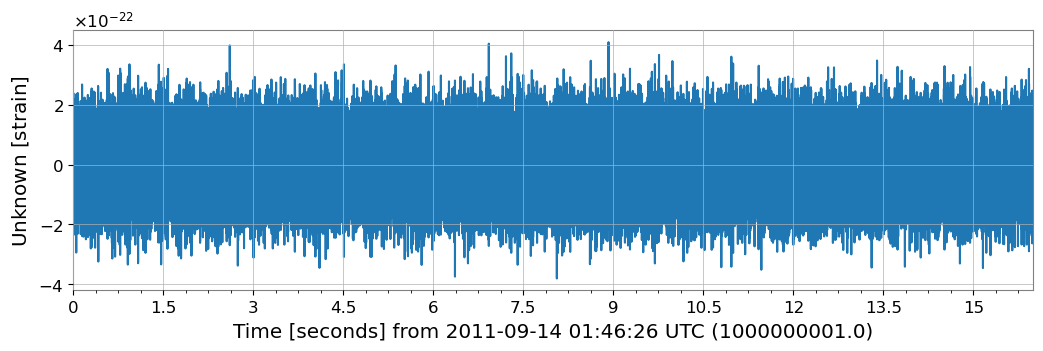

In [5]:
# Enabling inline plotting in Jupyter notebooks or IPython environments
%matplotlib inline

# Creating a plot of the gravitational wave strain data using the plot() method of the TimeSeries object
plot = e0.plot()


## Let's espimate the Power Spectral density with different approach

### gwpy ASD

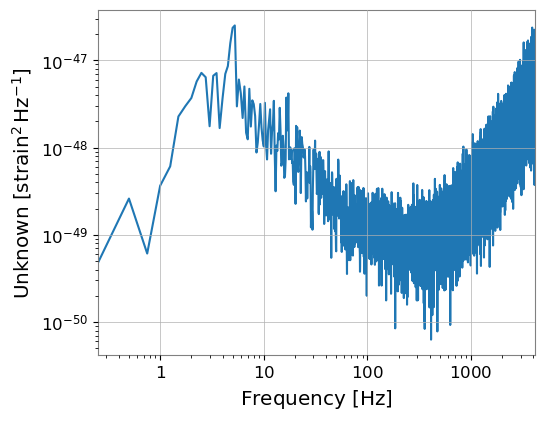

In [6]:
# Computing the amplitude spectral density (ASD) of the gravitational wave strain data
# The ASD is calculated using a Fast Fourier Transform (FFT) with a specified length of 4 seconds
# The median method is used to estimate the ASD
psd = e0.psd(fftlength=4, method="median")

# Creating a plot of the computed ASD using the plot() method of the ASD object
plot = psd.plot()

# Displaying the plot while suppressing any warning messages (if any)
plot.show(warn=False)


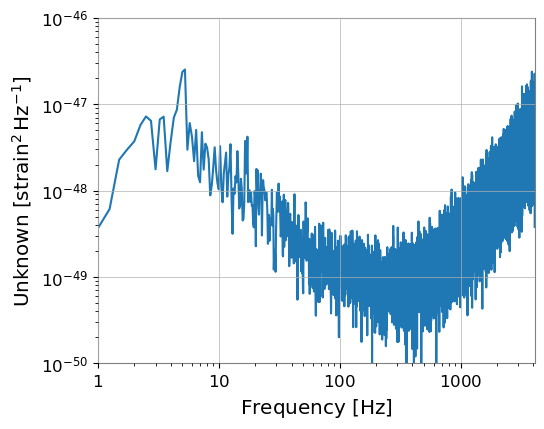

In [7]:
# Getting the current Axes instance from the plot
ax = plot.gca()

# Setting the x-axis (frequency) limits of the plot from 1 Hz to 4000 Hz
ax.set_xlim(1, 4096)

# Setting the y-axis (ASD values) limits of the plot from 1e-25 to 1e-23
ax.set_ylim(1e-50, 1e-46)

# Displaying the updated plot with adjusted axis limits
plot

### Scipy PSD

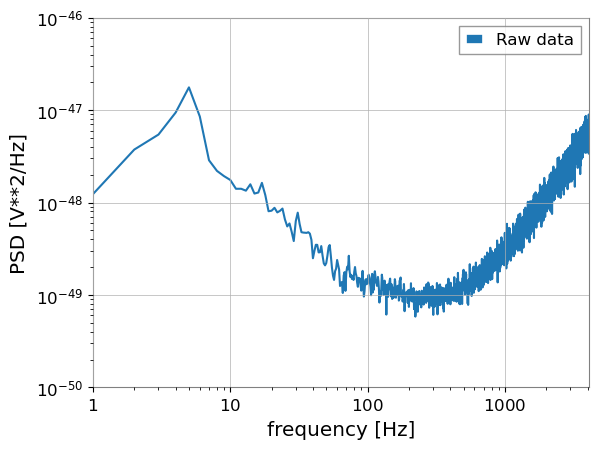

In [8]:
from scipy import signal
import matplotlib.pyplot as plt
fs=8192
# Calculate power spectral density (PSD) using Welch's method
f, Pxx_den = signal.welch(e0, fs, nperseg=8192)
 
 
# Plot PSD for raw data
plt.loglog(f, Pxx_den, label='Raw data')

# Plot PSD for whitened data
#ax.semilogy(f, Pxx_denW, label='Whitened data')
# Getting the current Axes instance from the plot
plot.gca()

# Set labels for x and y axes
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

# Setting the x-axis (frequency) limits of the plot from 1 Hz to 4000 Hz
plt.xlim(1, 4096)

# Setting the y-axis (ASD values) limits of the plot from 1e-25 to 1e-23
plt.ylim(1e-50, 1e-46) 
# Add legend
plt.legend()

# Show plot
plt.show()

## Whitening

### Whitening Procedure in Data Analysis

Whitening is a data preprocessing technique used to remove correlations between variables and normalize the variance of each feature. 
It is particularly useful in signal processing, machine learning, and statistics to improve the performance of algorithms and facilitate the interpretation of results.
The purpose of whitening is to modify the data such that the noise is spectrally flat, meaning it has an equal amount of power across all frequencies. This is done by applying a filter that compensates for the frequency-dependent response of the detector. The whitening process significantly improves the sensitivity of the detectors, enabling scientists to extract 
weak signals from the noise and identify potential gravitational wave events. Whitening can be done using techniques in frequency domain or in time-domain.

#### How Whitening Works

- **Decorrelation**: The primary objective of whitening is to decorrelate the features of the dataset. This is achieved by transforming the data such that the covariance matrix becomes the identity matrix. In other words, the transformed features are uncorrelated.
- **Normalization**: Whitening also involves normalizing the variance of each feature to be equal to one. This ensures that all features have the same scale and prevents features with larger variances from dominating the analysis.
- **Mathematical Transformation**: The whitening transformation is typically performed using techniques like Principal Component Analysis (PCA) or ZCA (Zero-phase Component Analysis). PCA whitening involves rotating the data to align with its principal components, while ZCA whitening additionally scales the data to account for the variances.
- **Centering**: Before applying whitening, it's essential to center the data by subtracting the mean of each feature. This ensures that the transformation is applied around the origin of the feature space.

#### Applications of Whitening

- **Feature Engineering**: Whitening can improve the performance of machine learning algorithms by removing redundant information and reducing the impact of noise.
- **Data Visualization**: Whitening can facilitate data visualization by simplifying the structure of the data and making it easier to identify patterns and relationships.
- **Signal Processing**: In signal processing, whitening can be used to preprocess signals before further analysis, such as in the detection of signals in noise or in source localization problems.
- **Statistical Analysis**: Whitening is also useful in statistical analysis to ensure that variables are independent and identically distributed, which can improve the validity of statistical tests and models.

#### Considerations and Limitations

- **Computational Cost**: Whitening procedures may be computationally expensive, especially for large datasets, due to the need for matrix operations and eigenvalue decompositions.
- **Sensitivity to Outliers**: Whitening techniques can be sensitive to outliers in the data, which may affect the estimation of covariance matrices and lead to suboptimal results.
- **Dimensionality Reduction**: Whitening can implicitly perform dimensionality reduction by reducing the dimensionality of the feature space to the number of uncorrelated features. However, this reduction may not always capture all the relevant information in the data.

### Whitening in frequency domain
The whitening process involves several steps. First, the data is transformed into the frequency domain using techniques such as fast Fourier transforms (FFT). Then, the noise spectrum is estimated by analyzing the power spectral density of the data. This spectrum represents the distribution of noise power across different frequencies.
Next, an inverse filter is applied to the data, which modifies the spectrum of the signal to flatten the noise. Essentially, the inverse filter boosts or attenuates specific frequency components to compensate for the frequency-dependent response of the detector. This equalization allows gravitational wave signals to be more easily distinguished from the noise. After the whitening procedure, the data is transformed back into the time domain, where it undergoes further analysis and searches for gravitational wave signals using sophisticated algorithms.



### GW data before and after the whitening
In the following tutorial we will use the FFT whitening used in the GW community, contained in gwpy package. 



## Whiten the data, using gwpy

In [9]:
# Whitening the strain data using a window of 16 seconds and a step of 2 seconds
white = e0.whiten(16, 2)

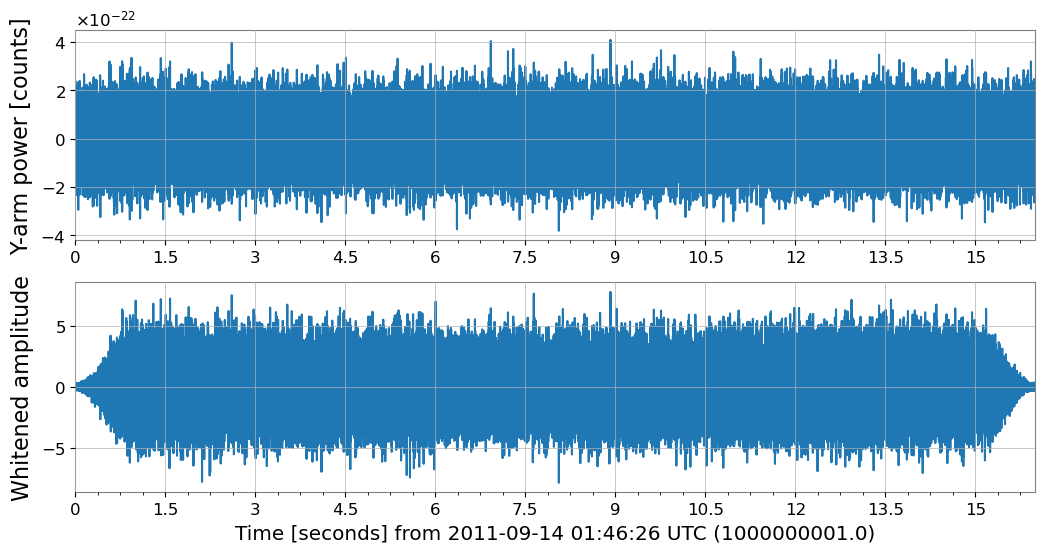

In [10]:
# Creating and displaying a multi-panel plot

# Import the 'Plot' class from the 'gwpy.plot' module
from gwpy.plot import Plot

# Create a multi-panel plot ('plot') with two panels: one for 'strain' data and one for 'white' data
# The 'separate=True' argument creates separate y-axes for each panel
# The 'sharex=True' argument shares the x-axis between the panels
plot = Plot(e0, white, separate=True, sharex=True)

# Set the y-axis label for the first panel (strain data)
plot.axes[0].set_ylabel('Y-arm power [counts]', fontsize=16)

# Set the y-axis label for the second panel (whitened data)
plot.axes[1].set_ylabel('Whitened amplitude', fontsize=16)

# Display the multi-panel plot
plot.show()


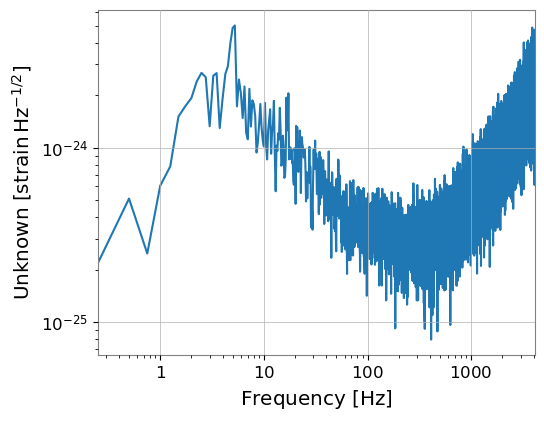

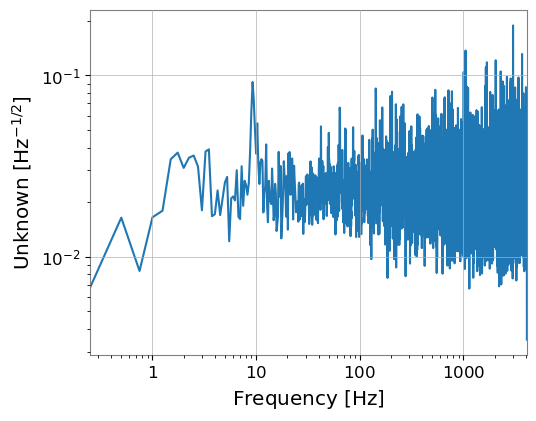

In [11]:
# Plotting Amplitude Spectral Density (ASD)

# Calculate and plot the ASD (Amplitude Spectral Density) of the original 'strain' data
# The 'fftlength=4' argument sets the length of the Fast Fourier Transform (FFT) window to 4 seconds
fig1 = e0.asd(fftlength=4).plot()

# Calculate and plot the ASD of the whitened 'white' data
# The 'fftlength=4' argument sets the length of the FFT window to 4 seconds
fig2 = white.asd(fftlength=4).plot()

# Uncomment the following lines to set custom x-axis and y-axis limits:
# plt.xlim(10, 2000)   # Set custom x-axis limits (frequency range)
# plt.ylim(1e-24, 1e-19)   # Set custom y-axis limits (ASD values)